### test to see how the probabilstic piping package works

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from probabilistic_piping import (  # type: ignore
    ProbInput,
    ProbPipingFixedWaterlevel,
    ProbPipingFixedWaterlevelSimple,
)

c:\Data\Python\TBCI\toolbox-continu-inzicht\.pixi\envs\default\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
df = pd.DataFrame(data=np.arange(0, 20 + 0.1, 0.1), columns=["waterlevels"])
df.to_csv("data_sets/waterlevels.csv", index=False)

In [9]:
# df_output = pd.read_excel("data_sets/invoer_piping.xlsx", index_col=0,sheet_name='output')
# df_output.to_csv('data_sets/full_test_output.csv',index=False)

In [15]:
# df_output = pd.read_excel("data_sets/invoer_piping.xlsx", index_col=0,sheet_name='output_simple')
# df_output.to_csv('data_sets/full_test_output_simple.csv',index=False)

In [16]:
df = pd.read_excel("data_sets/invoer_piping.xlsx", index_col=0, sheet_name="input")
# df.to_csv('data_sets/full_test_input.csv',index=False)

In [3]:
prob_input = ProbInput().from_dataframe(df)

In [4]:
settings, result = ProbPipingFixedWaterlevel().fixed_waterlevel_fragilitycurve(
    prob_input=prob_input, hlist=np.arange(0, 15, 0.25).tolist()
)

In [5]:
df = pd.DataFrame(
    data=[(res.h, res.prob_cond) for res in result.results],
    columns=["waterlevel", "failure_probability"],
)

<Axes: xlabel='waterlevel'>

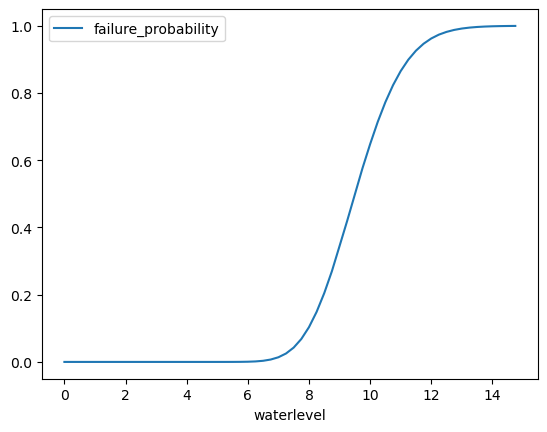

In [6]:
df.set_index("waterlevel").plot()

In [7]:
settings, res_uplift, res_heave, res_Sellmeijer, res_combined = (
    ProbPipingFixedWaterlevelSimple().fixed_waterlevel_fragilitycurve(
        prob_input=prob_input, hlist=np.arange(0, 15, 0.25).tolist()
    )
)

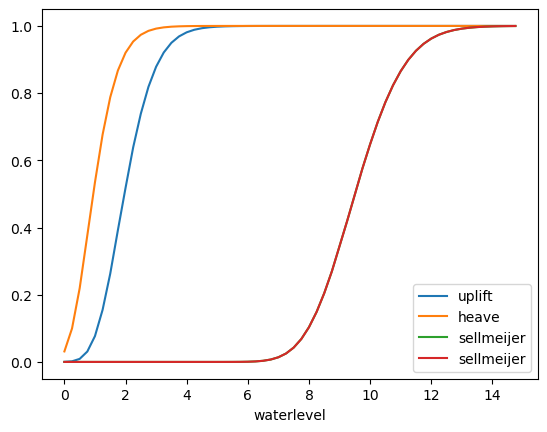

In [8]:
fig, ax = plt.subplots(1)
for result in [res_uplift, res_heave, res_Sellmeijer, res_combined]:
    df = pd.DataFrame(
        data=[(res.h, res.prob_cond) for res in result.results],
        columns=["waterlevel", result.results[0].mechanism],
    )
    df.set_index("waterlevel").plot(ax=ax)
    ax.legend()